In [1]:
import numpy

# number of data points
n_points = 50

# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(1)

# let's generate some "non-linear" data
X = numpy.random.uniform(0,10, n_points)
y = numpy.sin(X) + numpy.random.random(n_points) * 1

# reshape both arrays to make sure that we deal with N-dimensional Numpy arrays
y = y.reshape((len(y), 1))
X = X.reshape((len(X), 1))
print("Shape of our data matrix: %s" % str(X.shape))
print("Shape of our target vector: %s" % str(y.shape))

Shape of our data matrix: (50, 1)
Shape of our target vector: (50, 1)


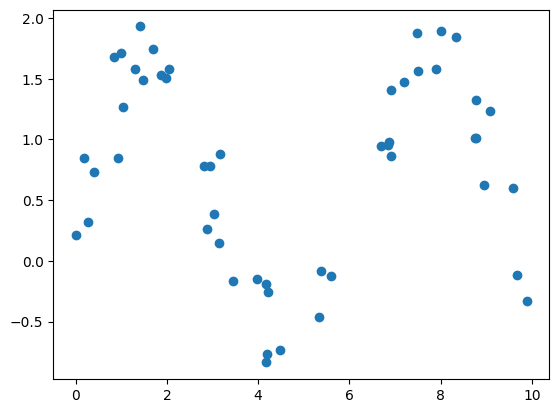

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'o')
plt.show()

In [3]:
def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies will occur
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        X_augmented = numpy.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

Let's split the dataset into a "training" and "validation" set. In this example, we use the first half as training set and the second one as validation set.

In [4]:
n = len(X) // 2

X_train, y_train, X_val, y_val = X[:n], y[:n], X[n:], y[n:]

In [5]:
import linreg

errors_train = []
errors_validation = []

# note: using large values here will lead to numerical inaccuracies
order_range = range(2,10)

for order in order_range:
    
    X_train_augmented = augment(X_train, order)
    X_val_augmented = augment(X_val, order)
    print("Shape of augmented data matrix: %s" % str(X_train_augmented.shape))
        
    # fit model on training set
    model = linreg.LinearRegression()
    model.fit(X_train_augmented, y_train)

    # get training predictions and error 
    preds_train = model.predict(X_train_augmented)
    error_train = ((preds_train - y_train)**2).mean()
    
    # get validation predictions and error
    preds_val = model.predict(X_val_augmented)
    error_val = ((preds_val - y_val)**2).mean()
    
    errors_train.append(error_train)
    errors_validation.append(error_val)

Shape of augmented data matrix: (25, 2)
Shape of augmented data matrix: (25, 3)
Shape of augmented data matrix: (25, 4)
Shape of augmented data matrix: (25, 5)
Shape of augmented data matrix: (25, 6)
Shape of augmented data matrix: (25, 7)
Shape of augmented data matrix: (25, 8)
Shape of augmented data matrix: (25, 9)


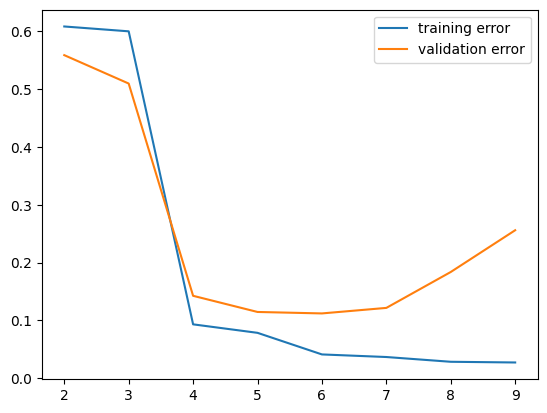

In [6]:
# training loss plot
plt.plot(order_range, errors_train, label="training error")
plt.plot(order_range, errors_validation, label="validation error")
plt.xticks(order_range)
plt.legend()
plt.show()